In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from tqdm import tqdm
from multiprocessing import Pool
import numpy.ma as ma
from scipy.ndimage import gaussian_filter, convolve
import sys

sys.path.append("../")
import utils

In [2]:
event_data = np.loadtxt("../semd_2d/data/simulation_3planes/events.txt")
position_data = np.loadtxt("../semd_2d/data/simulation_3planes/groundtruth.txt")

In [27]:
#params
t_start = 1.
duration = 0.05

img_height = 180
img_width = 240

Filter the events for a given time frame

In [28]:
events_range = utils.get_events_range(event_data, t_start, duration)

Select the patch of the events we want to consider

In [29]:
patch_center = (40, 76)
patch_size = 15
x_lim = (patch_center[1] - int(patch_size/2), patch_center[1] + int(patch_size/2))
y_lim = (patch_center[0] - int(patch_size/2), patch_center[0] + int(patch_size/2))
print(x_lim)

events_filtered = events_range
events_filtered = events_filtered[np.logical_and((x_lim[0] <= events_filtered[:,1]) , (events_filtered[:,1] <= x_lim[1]))]
events_filtered = events_filtered[np.logical_and((y_lim[0] <= events_filtered[:,2]) , (events_filtered[:,2] <= y_lim[1]))]
#events_filtered = events_filtered[[(y_lim[0] >= events_range[:,2]) & (events_range[:,2] <= y_lim[1])]
events_filtered = np.array(events_filtered)

(69, 83)


In [62]:
def img_from_events(events):
    img = np.zeros((img_height, img_width))
    for e in events:
        if e[3] == 1:
            continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] += 1
    return img

In [64]:
def img_from_events_patch(events, patch_size):
    img = np.zeros((patch_size, patch_size))
    for e in events:
        if e[3] == 1:
            continue
        x = int(e[1]) - patch_center[1] + int(patch_size/2)
        y = int(e[2]) - patch_center[0] + int(patch_size/2)
        img[y, x] += 1
    return img

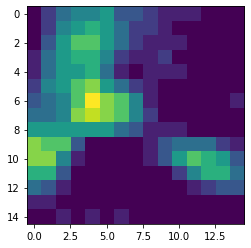

In [65]:
img = img_from_events_patch(events_filtered, patch_size)
plt.imshow(img)

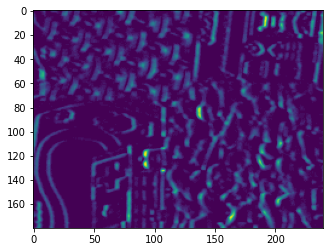

In [66]:
img = np.zeros((180, 240))
for e in events_range:
    if e[3] == 1:
        continue
    x = int(e[1])
    y = int(e[2])
    img[y, x] += 1
plt.imshow(img)

In [67]:
def filter_refactory(events, ref_time):
    time_dict = {}
    result = []
    for e in events:
        key = (e[1], e[2])
        if key not in time_dict:
            time_dict[key] = e[0]
            result.append(e)
            continue
        if e[0] - time_dict[key] > ref_time:
            time_dict[key] = e[0]
            result.append(e)
    return np.array(result)

In [68]:
events_filtered_ref = filter_refactory(events_filtered, 0.04)

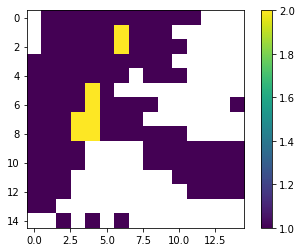

In [69]:
img = img_from_events_patch(events_filtered_ref, patch_size)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m)
plt.colorbar(mappable=m)

In [70]:
events_ref = filter_refactory(events_range, 0.09)

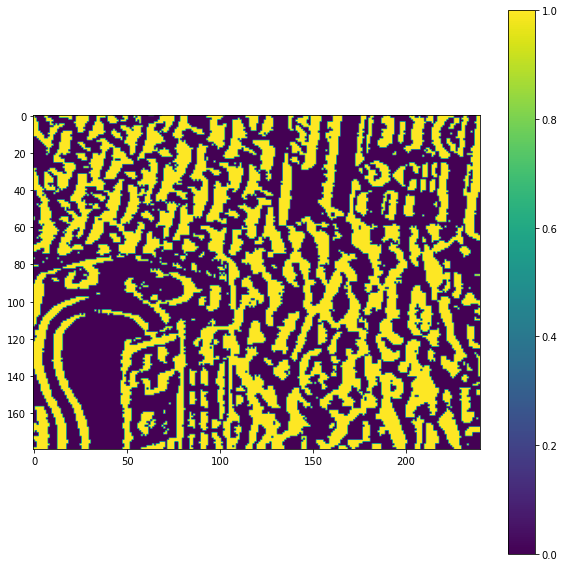

In [72]:
plt.figure(figsize=(10, 10))
img = img_from_events(events_ref)
m = plt.imshow(img)
plt.colorbar(mappable=m)

In [39]:
events_ref

array([[  1.00000017, 171.        ,  56.        ,   0.        ],
       [  1.00000057,  95.        , 150.        ,   1.        ],
       [  1.00000097,  21.        ,  49.        ,   1.        ],
       ...,
       [  1.04998017, 206.        , 132.        ,   0.        ],
       [  1.04998834,  65.        , 176.        ,   1.        ],
       [  1.0499996 , 185.        ,  88.        ,   0.        ]])

In [40]:
#np.savetxt("../data_processed/events_refact_circ5.txt", events_ref)

In [41]:
events_r = events_ref.copy()

In [42]:
test = events_r.copy()
test[:,1:] = events_r[:,1:].astype(int)

In [43]:
# np.savetxt("../data_processed/events_refact.txt", test)

In [44]:
a = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0]
])
u = np.array([
    [0.5, 1, 0],
    [1, 1, 0.5],
    [0, 1, 1]
])

In [45]:
t = a > np.zeros((3, 3))
t

array([[False, False,  True],
       [ True, False,  True],
       [False,  True, False]])

In [46]:
u[t] = a[t]

In [47]:
u

array([[0.5, 1. , 1. ],
       [1. , 1. , 1. ],
       [0. , 1. , 1. ]])

In [48]:
a = np.array([0, 1, 0, 1, 1, 0])
b = np.array([0.5, 1, 1, 0, 0.5, 0])

In [49]:
t = a > np.array([0, 0, 0, 0, 0, 0])
b[t] = 2

In [50]:
b

array([0.5, 2. , 1. , 2. , 2. , 0. ])